In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, utils, layers, models
from tensorflow.keras import optimizers

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

NUM_CLASSES = 10


170498071/170498071 [==============================] - 2s 0us/step


In [4]:
# Ensure the pixel values are between 0 and 1
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

# one-hot encode the y values (the image labels)
y_train = utils.to_categorical(y_train, NUM_CLASSES) 
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [7]:

# sequence API
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

2024-02-28 22:37:52.216038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10,activation='softmax')(x)
model=models.Model(input_layer,output_layer)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8480 - accuracy: 0.3343
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6636 - accuracy: 0.4051
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5849 - accuracy: 0.4336
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5284 - accuracy: 0.4572
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4890 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4612 - accuracy: 0.4791
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4331 - accuracy: 0.4903
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4101 - accuracy: 0.4987
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3863 - accuracy: 0.5050
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.365

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4499 - accuracy: 0.4795


[1.4499013423919678, 0.4794999957084656]

In [16]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 1ms/step


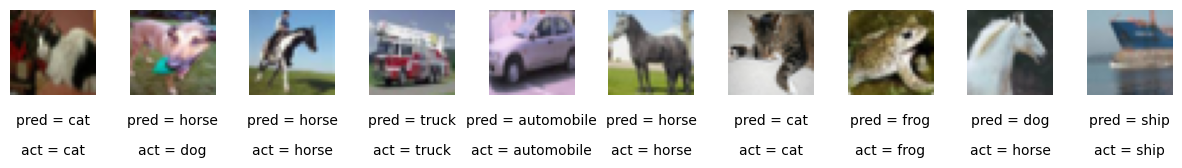

In [17]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)
